In [83]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler


/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/extmath.py:1137: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/extmath.py:1142: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/extmath.py:1162: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


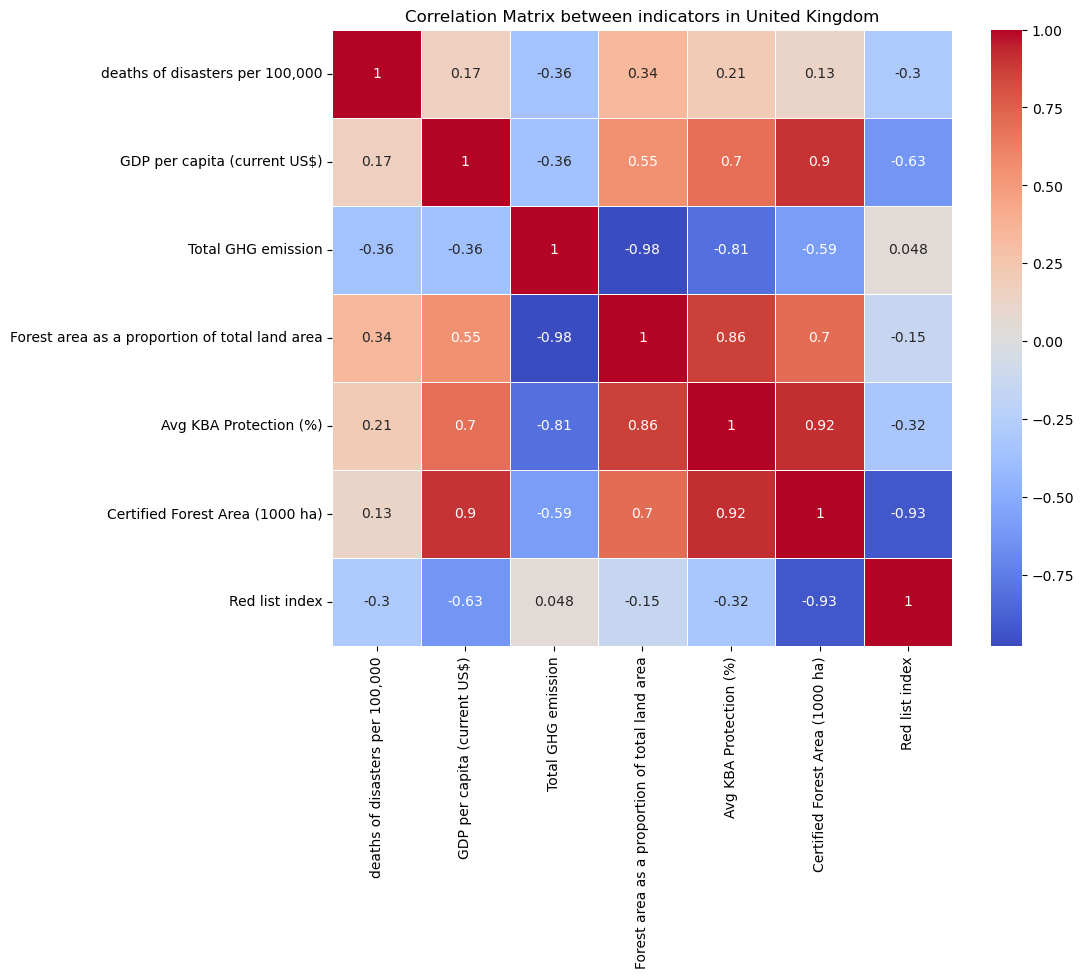

In [84]:
file_path = '/Users/rebeccachen/Desktop/UKdata.csv'
df = pd.read_csv(file_path)

# Filter data for UK
df_UK = df[df['Country'] == 'UK']

# Drop the 'Year' column and keep relevant columns for analysis
predictor_columns = df_UK.drop(columns=['Year'])

# Scaling the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(predictor_columns.drop(columns=['Country']))
scaled_df = pd.DataFrame(scaled_data, columns=predictor_columns.drop(columns=['Country']).columns)

# Reordering the columns to match the order you specified
new_column_order = [
    'deaths of disasters per 100,000',
    'GDP per capita (current US$)',
    'Total GHG emission',
    'Forest area as a proportion of total land area',
    'Terrestrial and freshwater Key Biodiversity Areas (KBAs) covered by protected areas\n',
    'Forest area certified under an independently verified certification scheme (thousands of hectares)\n',
    'Red list index'
]


# Reorder and rename columns
scaled_df = scaled_df[new_column_order]

scaled_df.rename(columns={
    'Total GHG Emissions/Capita': 'Total GHG Emissions/Capita',
    'Terrestrial and freshwater Key Biodiversity Areas (KBAs) covered by protected areas\n': 'Avg KBA Protection (%)',
    'Average proportion of Terrestrial Key Biodiversity Areas (KBAs)': 'Avg KBAs',
    'Forest area certified under an independently verified certification scheme (thousands of hectares)\n': 'Certified Forest Area (1000 ha)'}, 
    inplace=True)

# Calculate the Pearson correlation matrix
correlation_matrix = scaled_df.corr()

# Create the heatmap
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix between indicators in United Kingdom')
plt.show()

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/stattools.py:1545: FutureWarning: verbose is deprecated since function

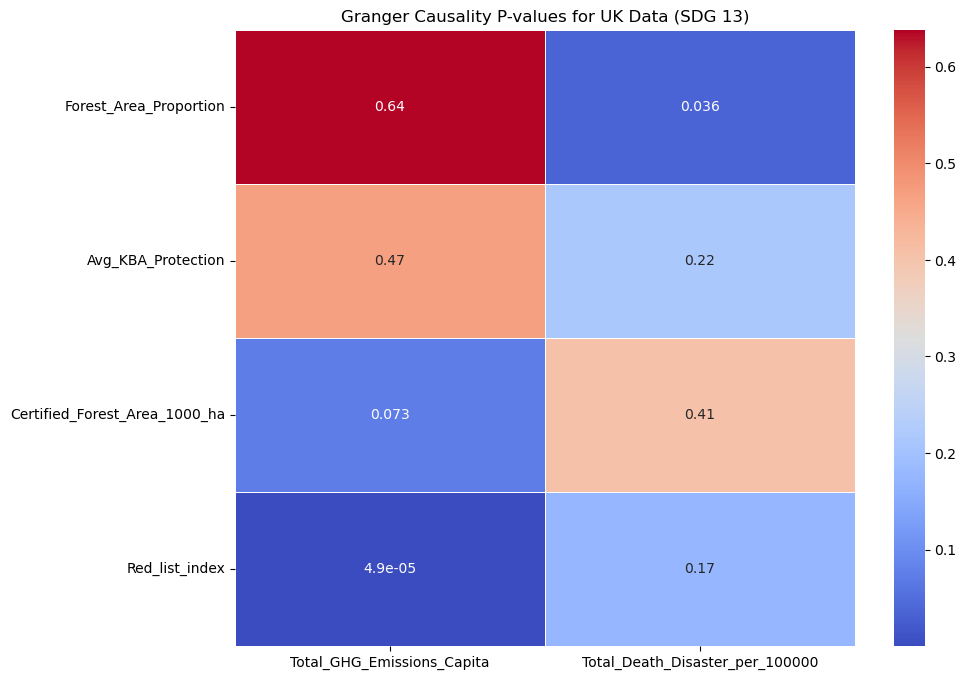

In [85]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import grangercausalitytests

# Load your dataset
file_path = '/Users/rebeccachen/Desktop/UKdata.csv'
df_uk = pd.read_csv(file_path)

# Clean up the dataset and rename relevant columns for clarity
df_uk_cleaned = df_uk.drop(columns=[col for col in df_uk.columns if 'Unnamed' in col or col == 'Year' or col == 'Country'])
df_uk_cleaned.rename(columns={
    'deaths of disasters per 100,000': 'Total_Death_Disaster_per_100000',
    'Total GHG emission': 'Total_GHG_Emissions_Capita',
    'Forest area as a proportion of total land area': 'Forest_Area_Proportion',
    'Terrestrial and freshwater Key Biodiversity Areas (KBAs) covered by protected areas\n': 'Avg_KBA_Protection',
    'Forest area certified under an independently verified certification scheme (thousands of hectares)\n': 'Certified_Forest_Area_1000_ha',
    'Red list index': 'Red_list_index'
}, inplace=True)

# Define the target and predictor variables
target_variables = ['Forest_Area_Proportion', 'Avg_KBA_Protection', 'Certified_Forest_Area_1000_ha', 'Red_list_index']
predictors = ['Total_GHG_Emissions_Capita', 'Total_Death_Disaster_per_100000']

# Define the maximum lag to consider
max_lag = 2
results = {}

# Granger causality test and collecting p-values
for target in target_variables:
    p_values = []
    for predictor in predictors:
        try:
            # Ensure no missing values and sufficient observations
            data = df_uk_cleaned[[target, predictor]].dropna()
            if data.shape[0] > 3 * max_lag + 1:  # Ensure enough data for Granger causality test
                test_result = grangercausalitytests(data, max_lag, verbose=False)
                # Extract p-values for each lag and append to list
                p_values.append([test_result[i+1][0]['ssr_ftest'][1] for i in range(max_lag)])
            else:
                p_values.append([np.nan] * max_lag)  # Append NaNs if insufficient data
        except:
            p_values.append([np.nan] * max_lag)
    # Store the minimum p-value across lags
    results[target] = np.min(p_values, axis=1)

# Convert the results to a DataFrame
granger_df = pd.DataFrame(results, index=predictors)

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(granger_df.T, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Granger Causality P-values for UK Data (SDG 13)')
plt.show()
